In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False

In [2]:
df = pd.read_csv('ddata/pima-indians-diabetes.data.csv')

In [3]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [4]:
x_data = df.iloc[:,:-1].values
y_data = df.iloc[:,[-1]].values

In [5]:
# 1. 정규화

In [6]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_data)

In [7]:
x = tf.constant(x_scaled, tf.float32)
y = tf.constant(y_data, tf.float32)

In [8]:
x.shape

TensorShape([768, 8])

In [9]:
initX =tf.initializers.GlorotUniform()

w = tf.Variable( initX(shape=[x.shape[1],1]))
b = tf.Variable( initX(shape=[1]))

In [10]:
def compute_loss():
    z = tf.matmul(x, w) + b
    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits = z) # sum(y*-log(y^) + (1-y)*-log(1-y^))
    cost = tf.reduce_mean(cost_i) # binary cross entropy 값
    return cost

In [22]:
# if i%100 == 0:
#     print(i, "cost: ", compute_loss().numpy())
#epochs 100의 배수일 때만 결과 출력하기

In [11]:
optimizer = Adam(0.3)
for i in range(1000):
    optimizer.minimize(compute_loss, var_list = [w,b])
    if i%100 == 0:
        print(i, "cost: ", compute_loss().numpy())

0 cost:  0.7331117
100 cost:  0.4890044
200 cost:  0.47212717
300 cost:  0.47104105
400 cost:  0.47099409
500 cost:  0.47099316
600 cost:  0.47099313
700 cost:  0.47099313
800 cost:  0.47099313
900 cost:  0.47099313


In [12]:
def hxfn(xdata):
    xd = tf.constant(xdata, tf.float32)
    z = tf.matmul(xd, w) + b
    hx = tf.nn.sigmoid(z)
    return (hx.numpy()>=0.5) + 0 

In [13]:
# 2. 6,148,72,35,0,33.6,0.627,50 당뇨유무 판별

In [14]:
test = [[6,148,72,35,0,33.6,0.627,50]]
test = scaler.transform(test)
hxfn(test)

array([[1]])

In [15]:
# 3. confusion matrix, 정확도, f1 score

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [17]:
pred = hxfn(x_scaled)
pred

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [18]:
confusion = confusion_matrix( y_data, pred)
confusion

array([[445,  55],
       [112, 156]], dtype=int64)

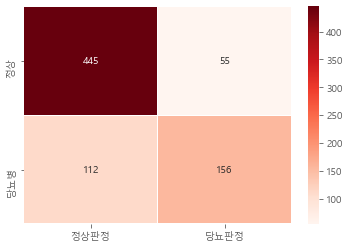

In [19]:
sns.heatmap( confusion, annot=True, fmt='d', linewidths=0.2, cmap='Reds', #annot -> 상관계수값/ fmt -> 데이터 타입
           xticklabels=['정상판정','당뇨판정'], yticklabels=['정상','당뇨병'] )
plt.show()

In [20]:
accuracy = accuracy_score(y_data, pred)
accuracy

0.7825520833333334

In [21]:
f1 = f1_score( y_data, pred)
f1

0.651356993736952